# Data Generation

This notebook generates the data for the VRP instances.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

from datetime import datetime
from pathlib import Path
from utils.data import generate_vrp_instance, solve, generate_and_solve
from utils.plot import plot_instance
from utils.solver import Solver

## Test the functions

In [2]:
%%time
instance = generate_vrp_instance(20)
solution, solver = solve(instance)

CPU times: user 2.97 s, sys: 29.6 ms, total: 3 s
Wall time: 3.01 s


In [3]:
solution

{'routes': {0: [],
  1: [],
  2: [9, 18, 2, 7, 11],
  3: [1, 17, 4, 12, 16, 5, 3, 13, 8],
  4: [15, 10, 14, 6, 19]},
 'total_distance': 4714}

In [4]:
solver.print_solution()

Objective: 4714
Route for vehicle 0:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 2:
 0 Load(0) ->  9 Load(6) ->  18 Load(10) ->  2 Load(13) ->  7 Load(17) ->  11 Load(27) ->  0 Load(27)
Distance of the route: 1111m
Load of the route: 27

Route for vehicle 3:
 0 Load(0) ->  1 Load(8) ->  17 Load(18) ->  4 Load(22) ->  12 Load(26) ->  16 Load(28) ->  5 Load(30) ->  3 Load(31) ->  13 Load(37) ->  8 Load(39) ->  0 Load(39)
Distance of the route: 2372m
Load of the route: 39

Route for vehicle 4:
 0 Load(0) ->  15 Load(10) ->  10 Load(16) ->  14 Load(18) ->  6 Load(26) ->  19 Load(34) ->  0 Load(34)
Distance of the route: 1231m
Load of the route: 34

Total distance of all routes: 4714m
Total load of all routes: 100


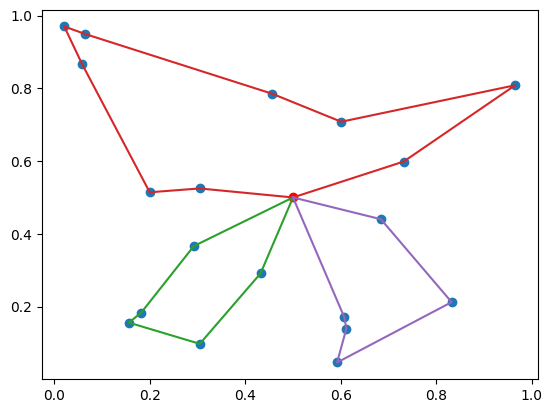

In [5]:
plot_instance(instance, solution['routes'])

In [11]:
import pickle
import torch

from utils.data import Data, VRPDataset, load_pickle

data_dir = Path('data')

In [12]:
results = load_pickle(data_dir / 'vrp_20_nodes.pkl')

train, test = Data.load(results, test_size=0.05)

In [13]:
len(train), len(test)

(4750, 250)

In [14]:
train_dataset = VRPDataset(train)
test_dataset = VRPDataset(test)

torch.save(train_dataset, data_dir / 'vrp_20_train.pt')
torch.save(test_dataset, data_dir / 'vrp_20_test.pt')